In [1]:
import pandas as pd
import numpy as np
import chardet

# matplotlib for plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for plots
import seaborn as sns

# statsmodels for regression
import statsmodels.formula.api as sm

#importing all important libraries and dataset:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from scipy import stats

# Importing necessary Libraries that are essential for the EDA
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error

#importing decision tree classifier and tree regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset:
candy=pd.read_csv('Week_4.csv')

In [3]:
candy.shape

(85, 13)

In [4]:
#Exploring data:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,61.000000,85.000000,82.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.475410,0.478647,0.467195,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.503539,0.282778,0.283934,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.258000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [5]:
candy.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
pluribus            24
sugarpercent         0
pricepercent         3
winpercent           0
dtype: int64

## Data Cleaning

In [6]:
candy.pricepercent.fillna(value=candy['pricepercent'].mean(), inplace=True)
candy.isnull().sum()

competitorname       0
chocolate            0
fruity               0
caramel              0
peanutyalmondy       0
nougat               0
crispedricewafer     0
hard                 0
bar                  0
pluribus            24
sugarpercent         0
pricepercent         0
winpercent           0
dtype: int64

## Exploratory Data Analysis

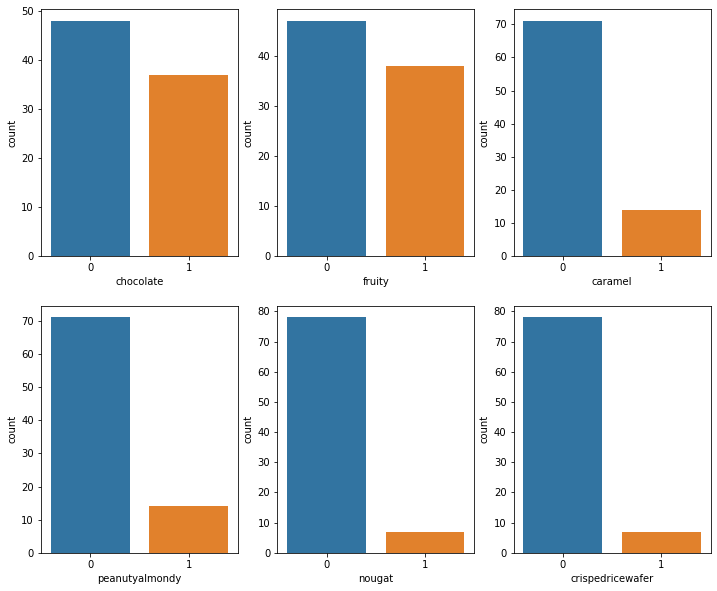

In [7]:
fillings = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer"]

def count(inside):
    sns.countplot(x=inside, data=candy)
    
fig, ax = plt.subplots(2,3, figsize=(12,10))
for key, value in enumerate(fillings,1):
    plt.subplot(2,3,key)
    count(value)

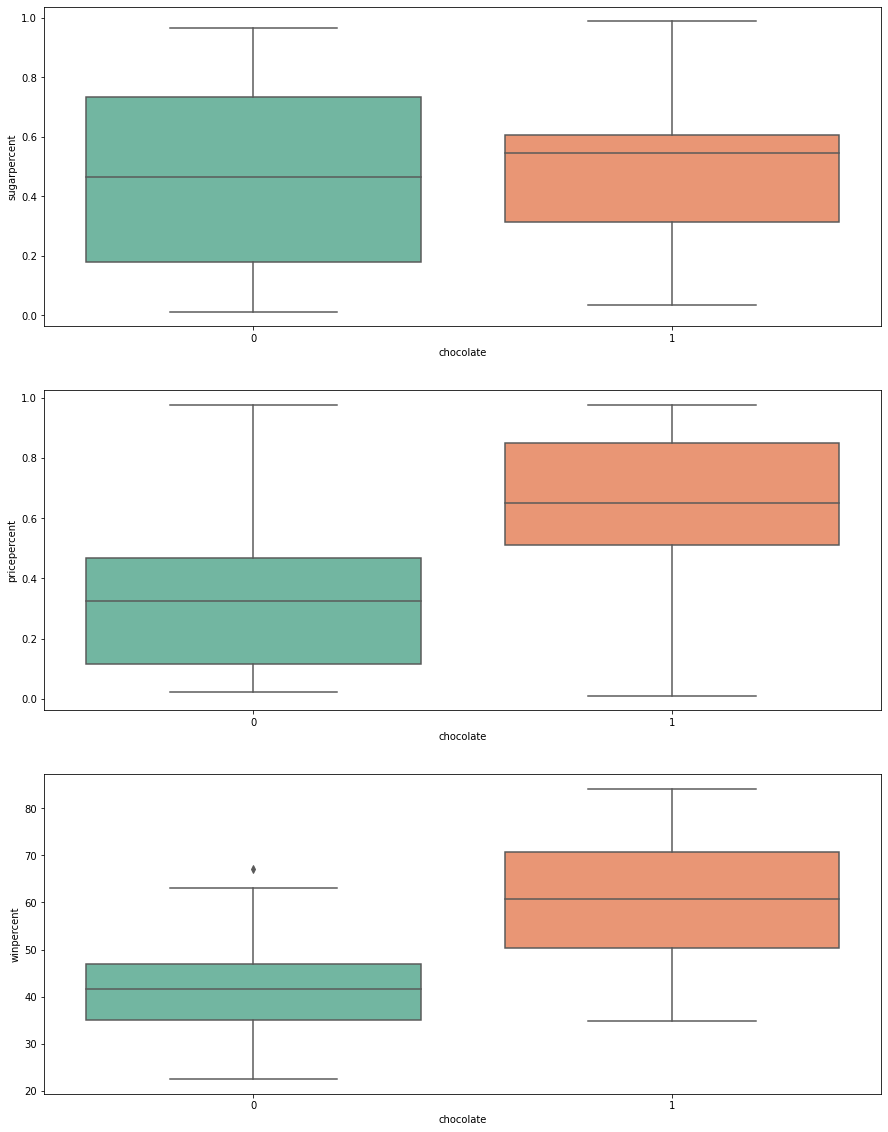

In [8]:
#Checking for Outliers and suspecious data:
def box(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="chocolate", y=var, data=candy,palette='Set2')
fig, ax = plt.subplots(3, 1,figsize=(15,20))
plt.subplot(3,1,1)
box('sugarpercent')
plt.subplot(3,1,2)
box('pricepercent')
plt.subplot(3,1,3)
box('winpercent')

<AxesSubplot:>

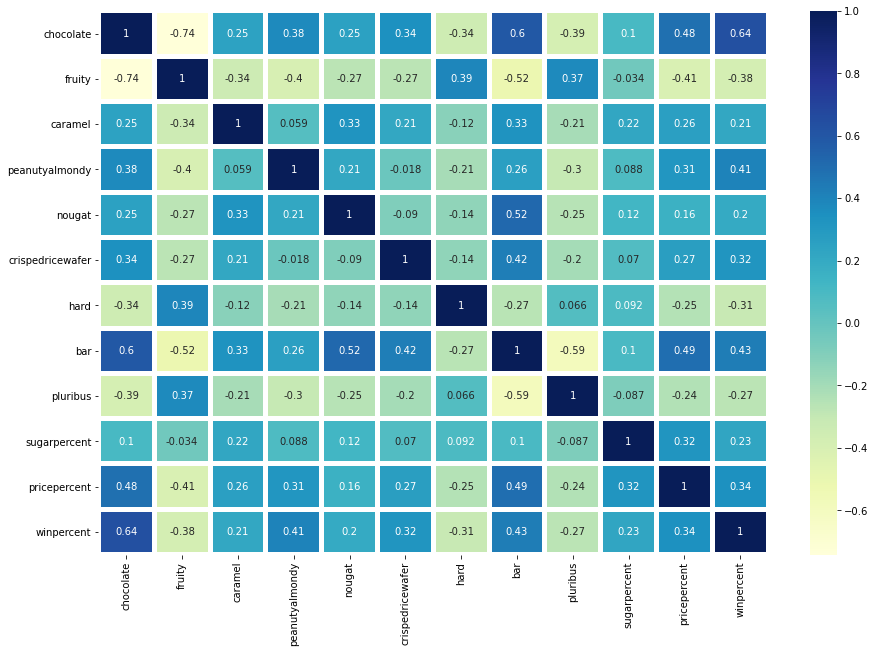

In [9]:
#Correlation plot for Exploration:
plt.figure(figsize=(15,10))
sns.heatmap(candy.corr(),cmap='YlGnBu',annot=True,linecolor='white',linewidths=4)

<AxesSubplot:xlabel='winpercent', ylabel='competitorname'>

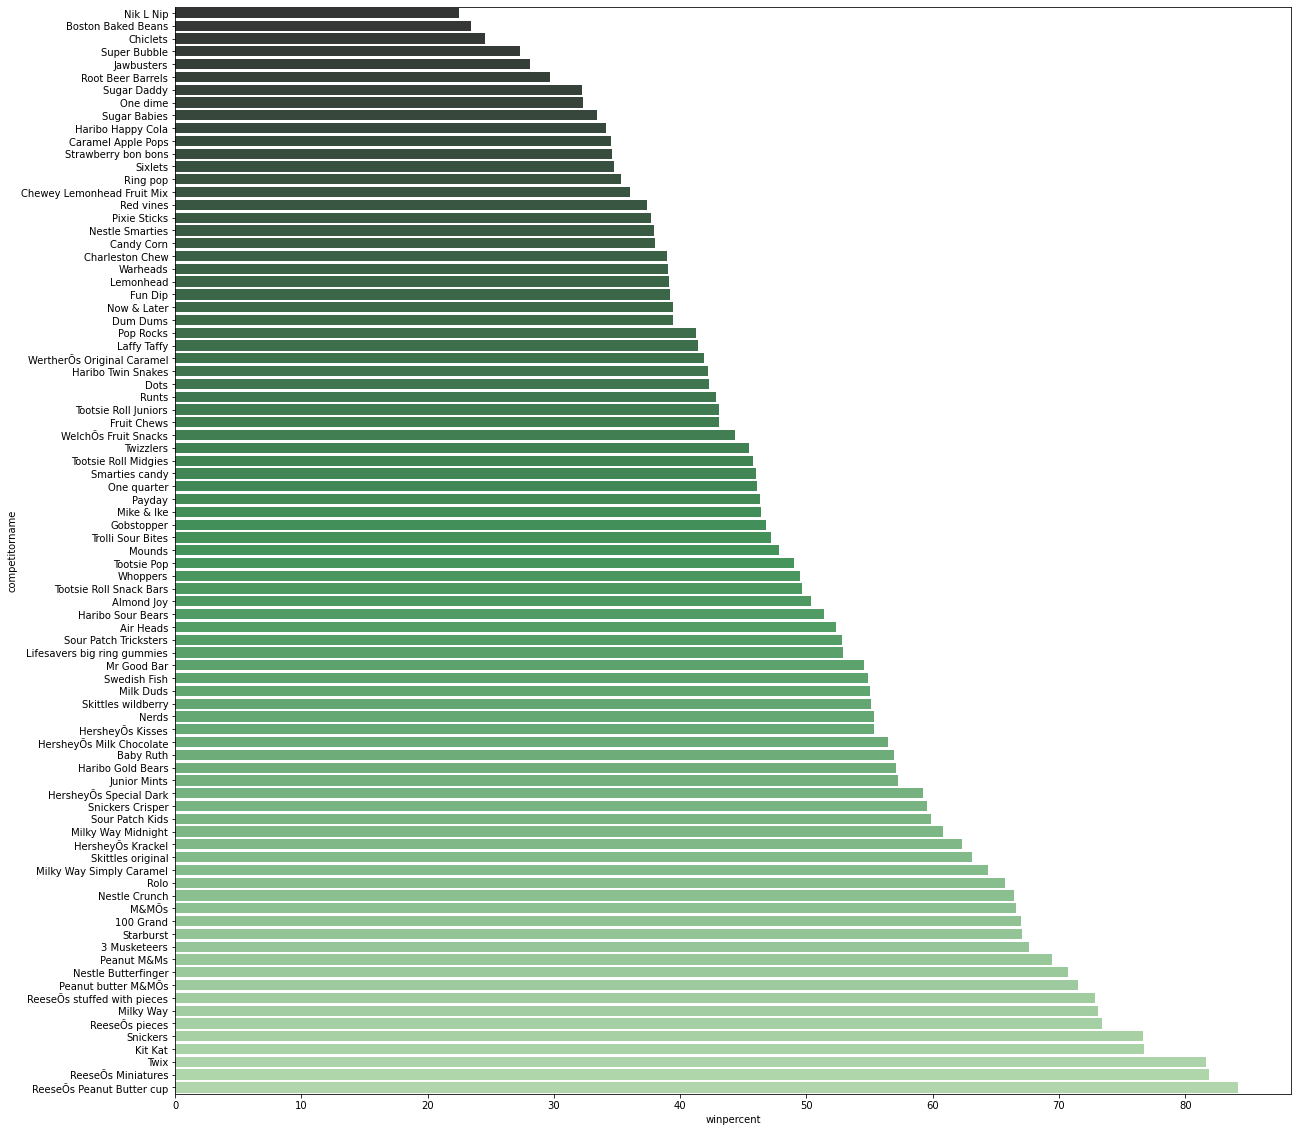

In [10]:
candy = candy.sort_values(by="winpercent", ascending=True)

plt.figure(figsize=(20,20))
sns.barplot(y=candy["competitorname"], x=candy["winpercent"])
pal = sns.color_palette("Greens_d", len(candy))
rank = candy.winpercent.argsort().argsort()
sns.barplot(x=candy.winpercent, y=candy.competitorname, palette=np.array(pal[::-1])[rank])

## Data Preparation before Modelling

In [11]:
# convert YES/NO features from integer type to boolean
#Independent variables

independent_variables = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
candy[independent_variables] = candy[independent_variables].astype(bool)

#Dependent variable
dependent_variable = 'winpercent'

In [12]:
# list of numerical variables
numeric_variables_list = candy.select_dtypes(include=['int', 'float']).columns.tolist()

# remove dependent variable from numerical variable list
numeric_feature_list = [feat for feat in numeric_variables_list if not feat==dependent_variable]
numeric_feature_list

['sugarpercent', 'pricepercent']

## Linear Regression

In [13]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + sugarpercent + pricepercent


In [14]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     8.575
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           3.98e-09
Time:                        00:05:14   Log-Likelihood:                -315.95
No. Observations:                  85   AIC:                             653.9
Df Residuals:                      74   BIC:                             680.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Stepwise Regression

In [15]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus' and col!='bar'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + sugarpercent + pricepercent


In [16]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     9.650
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.24e-09
Time:                        00:05:14   Log-Likelihood:                -315.97
No. Observations:                  85   AIC:                             651.9
Df Residuals:                      75   BIC:                             676.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [17]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus' and col!='bar'and col!='nougat'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + caramel + peanutyalmondy + crispedricewafer + hard + sugarpercent + pricepercent


In [18]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     10.97
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           3.73e-10
Time:                        00:05:14   Log-Likelihood:                -316.02
No. Observations:                  85   AIC:                             650.0
Df Residuals:                      76   BIC:                             672.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [19]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus' and col!='bar'and col!='nougat' and col!='caramel'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + peanutyalmondy + crispedricewafer + hard + sugarpercent + pricepercent


In [20]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     12.50
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.37e-10
Time:                        00:05:14   Log-Likelihood:                -316.39
No. Observations:                  85   AIC:                             648.8
Df Residuals:                      77   BIC:                             668.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [21]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus' and col!='bar'and col!='nougat' and col!='caramel' and col!='pricepercent'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + peanutyalmondy + crispedricewafer + hard + sugarpercent


In [22]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     14.54
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.62e-11
Time:                        00:05:14   Log-Likelihood:                -316.76
No. Observations:                  85   AIC:                             647.5
Df Residuals:                      78   BIC:                             664.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [23]:
linear_reg_formula = dependent_variable + ' ~ ' + ' + '.join([col for col in candy.columns[:] if col!=dependent_variable and col!='competitorname' and col!='pluribus' and col!='bar'and col!='nougat' and col!='caramel' and col!='pricepercent' and col!='hard'])
print(linear_reg_formula)

winpercent ~ chocolate + fruity + peanutyalmondy + crispedricewafer + sugarpercent


In [24]:
linear_regression_model = sm.ols(formula=linear_reg_formula, data=candy).fit()
print(linear_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     16.44
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           4.30e-11
Time:                        00:05:14   Log-Likelihood:                -318.34
No. Observations:                  85   AIC:                             648.7
Df Residuals:                      79   BIC:                             663.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Is there any relation between Chocolate and fruity?

In [25]:
var1 = 'chocolate'
var2 = 'fruity'
candy_aux = pd.DataFrame(np.zeros((2, 2)), index=[[var1, var1],['Yes','No']], columns=[[var2, var2],['Yes','No']])

idx = pd.IndexSlice
candy_aux.loc[idx[var1,'No'], idx[:,'No']] = candy[(candy[var1]==False) & (candy[var2]==False)].count()[0]
candy_aux.loc[idx[var1,'No'], idx[:,'Yes']] = candy[(candy[var1]==False) & (candy[var2]==True)].count()[0]
candy_aux.loc[idx[var1,'Yes'], idx[:,'No']] = candy[(candy[var1]==True) & (candy[var2]==False)].count()[0]
candy_aux.loc[idx[var1,'Yes'], idx[:,'Yes']] = candy[(candy[var1]==True) & (candy[var2]==True)].count()[0]
assert candy_aux.sum().sum() == 85
candy_aux.astype(int)

fruity    
                 Yes  No
chocolate Yes      1  36
          No      37  11

In [26]:
candy.loc[(candy.chocolate==True) & (candy.fruity==True),:].winpercent.describe()[:2]

count     1.000000
mean     48.982651
Name: winpercent, dtype: float64

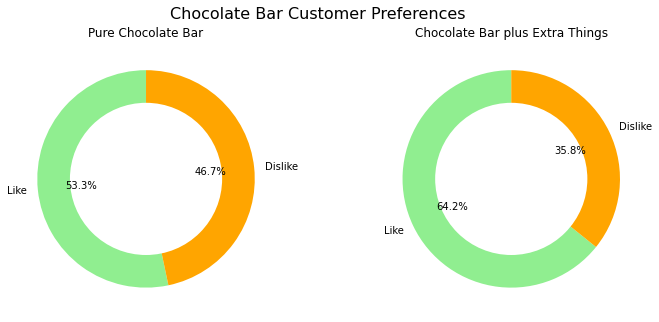

In [27]:
# Only chocolate bar vs chocolate with other ingredient

## calculations
only_chocolate = candy[(candy["chocolate"] == 1) & (candy["bar"] == 1) & (candy["caramel"] == 0) & 
     (candy["peanutyalmondy"] == 0) & (candy["nougat"] == 0) & (candy["crispedricewafer"] == 0)]

choco_and_others = candy[(candy["chocolate"] == 1) & (candy["bar"] == 1) & ((candy["caramel"] == 1) | 
     (candy["peanutyalmondy"] == 1) | (candy["nougat"] == 1) | (candy["crispedricewafer"] == 1))]

only_chocolate_percent = round(np.sum(only_chocolate["winpercent"])/len(only_chocolate), 2)
choco_and_others_percent = round(np.sum(choco_and_others["winpercent"])/len(choco_and_others), 2)


# pie charts (graphics)
y_only_choco = np.array([only_chocolate_percent, 100-only_chocolate_percent])
y_choco_others = np.array([choco_and_others_percent, 100-choco_and_others_percent])

pie_labels = ["Like", "Dislike"]

fig = plt.figure(figsize=(12,5))
fig.suptitle('Chocolate Bar Customer Preferences', fontsize=16)
plt.subplot(1, 2, 1)

plt.title('Pure Chocolate Bar')
plt.pie(y_only_choco, labels = pie_labels, startangle = 90, colors=["LightGreen", "Orange"], autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1, 2, 2)
plt.title('Chocolate Bar plus Extra Things')
plt.pie(y_choco_others, labels = pie_labels, startangle = 90, colors=["LightGreen", "Orange"], autopct='%1.1f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 

## Identifying Most important variables

In [28]:
candy.loc[(candy.chocolate==False) & (candy.fruity==False),:].winpercent.describe()[:2]

count    11.000000
mean     35.932801
Name: winpercent, dtype: float64

In [29]:
candy.loc[(candy.fruity==True) & (candy.peanutyalmondy==False) & (candy.sugarpercent>0.8),:].winpercent.describe()[:2]

count     7.000000
mean     51.704079
Name: winpercent, dtype: float64

In [30]:
candy.loc[(candy.chocolate==True) & (candy.peanutyalmondy==True),:].winpercent.describe()[:2]

count    12.000000
mean     68.503791
Name: winpercent, dtype: float64

In [31]:
candy.loc[(candy.chocolate==True) & (candy.peanutyalmondy==True) & (candy.sugarpercent>0.8),:].winpercent.describe()[:2]

count     2.000000
mean     72.176476
Name: winpercent, dtype: float64